In [2]:
#from sklearn.datasets import make_biclusters
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import squareform, pdist


from matplotlib import pyplot as plt

import numpy as np
import plotly
import pandas as pd
#from ete3 import Tree
#from ete3 import PhyloTree


# UPGMA with Sci-py

Following this [walkthrough](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

In [3]:
df = pd.read_csv('matrix.csv').set_index("Unnamed: 0")
df

,a,b,c,d,e
Unnamed: 0,,,,,
a,0,3,21,31,23
b,3,0,30,34,21
c,21,30,0,28,39
d,31,34,28,0,43
e,23,21,39,43,0


In [4]:
X = df.to_numpy()
X = squareform(X)
X

array([ 3, 21, 31, 23, 30, 34, 21, 28, 39, 43], dtype=int64)

In [5]:
# generate the linkage matrix
Z = linkage(X, 'average')

In [179]:
#check cophenetic distance. Closer to 1 is better.
#c, coph_dists = cophenet(Z, pdist(X))
#c

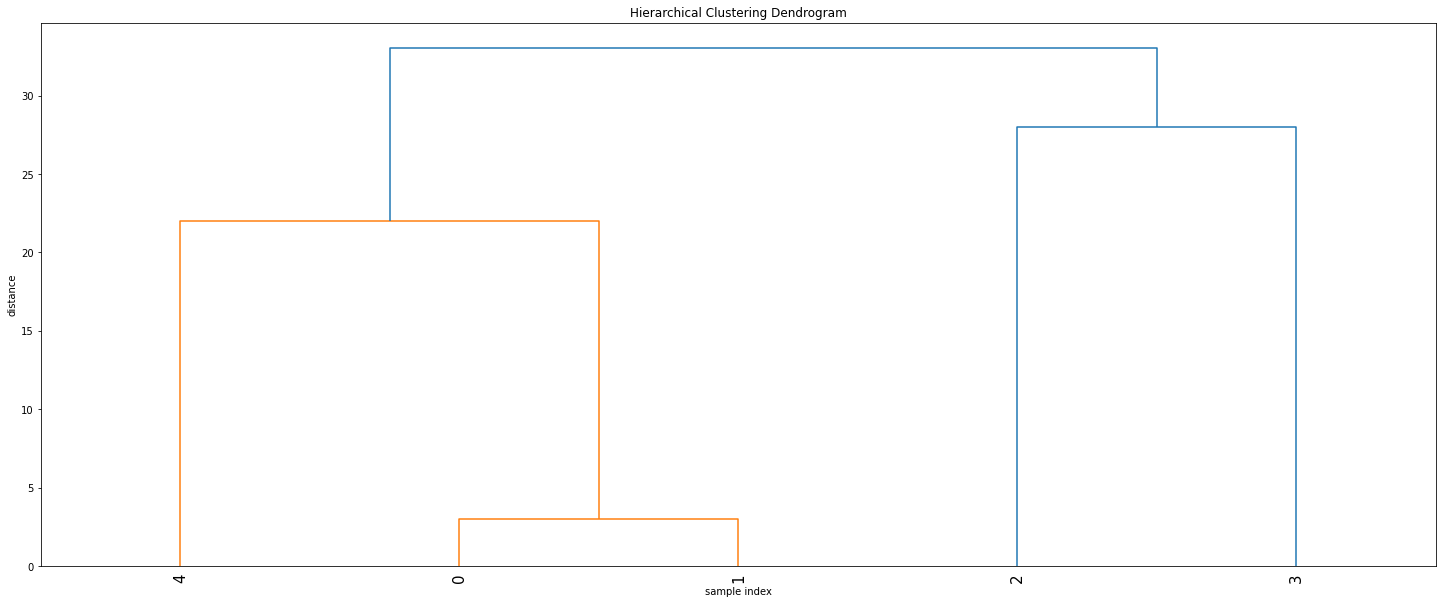

In [6]:
#Make a dendrogram of the linkage with matplotlib

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [10]:
#make clusters using a cutoff
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 3, 4, 2], dtype=int32)

In [13]:
Z

array([[ 0.,  1.,  3.,  2.],
       [ 4.,  5., 22.,  3.],
       [ 2.,  3., 28.,  2.],
       [ 6.,  7., 33.,  5.]])

# UPGMA with Scikit-learn

In [27]:
df = pd.read_csv('matrix.csv').set_index("Unnamed: 0")

df

X = df.to_numpy()
#X = squareform(X)
X

array([[ 0,  3, 21, 31, 23],
       [ 3,  0, 30, 34, 21],
       [21, 30,  0, 28, 39],
       [31, 34, 28,  0, 43],
       [23, 21, 39, 43,  0]], dtype=int64)

In [51]:
model = AgglomerativeClustering(distance_threshold=25,      #cophenetic distance to put things into clusters 
                                n_clusters=None,
                                linkage = 'average',       # i.e., UPGMA
                                affinity = 'precomputed',  #for distance matrices
                                compute_distances = True   #not sure
                               )

In [57]:
#this object can be converted to a dendrogram
model = model.fit(df)

#this object contains the clustering info
result = model.fit_predict(df)

In [78]:
#make a dataframe of the clustering info
df_cls = pd.DataFrame(result, 
                      index = model.feature_names_in_, 
                      columns = ['cluster']).reset_index().rename(columns = {'index' : 'thing'})

In [37]:
#make a dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

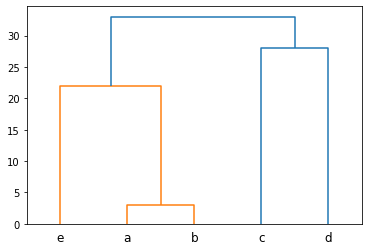

In [55]:
plot_dendrogram(model, labels = model.feature_names_in_)
#plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:

t = Tree()
t.populate(30)
print(t)

In [47]:
nodes = t.search_nodes(dist=0.5)
print(nodes)

[]
